# Import Library

In [1]:
import numpy as np
import pandas as pd
import re 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import scipy.stats as st

# Data Preparation

## Load Data

In [4]:
data = pd.read_csv('Data/Data training/train_preprocess.tsv',names= ['text', 'label'], delimiter='\t')

In [5]:
data

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


## Cek data 5 teratas dan terbawah

Terlebih dahulu kita mengecek data yang akan kita proses sebelum dilakukan analisis

In [6]:
data.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [7]:
data.tail()

,text,label
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative
10999,meskipun sering belanja ke yogya di riau junct...,positive


## Cek jumlah kolom dan total data

In [10]:
data.shape

(11000, 2)

Data yang diolah memiliki 2 kolom dan total data 11000

## Cek total duplikat data

In [11]:
data.duplicated().sum()

67

Total data yang duplikat sejumlah 67

Menghilangkan data yang duplikat

In [12]:
df = data.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(10933, 2)

## Cek Missing Values

In [15]:
df.isna()

,text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10993,False,False
10994,False,False
10996,False,False
10998,False,False


syntax dibawah untuk melihat persentase missing values dari setiap kolom. Terlihat pada setiap kolom memiliki persentase 0. Ini menandakan data kita aman dari missing values

In [16]:
df.isna().sum()/df.shape[0]

text     0.0
label    0.0
dtype: float64

### Buat kolom baru bernama "total_char" berisi panjang karakter dari setiap teks.

In [17]:
df['total_char'] = df.text.apply(len)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12056\130973601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_char'] = df.text.apply(len)


### Buat kolom baru bernama "total_word" berisi banyaknya kata dari setiap teks.

In [19]:
df['total_word'] = df.text.apply(lambda sent: len(sent.split()))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12056\228256200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_word'] = df.text.apply(lambda sent: len(sent.split()))


In [20]:
df.head()

,text,label,total_char,total_word
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,404,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,102,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,184,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,93,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,214,38


# Data Analysis

Descriptive Analytic dalam kasus teks sering disebut Exploratory Data Analysis (EDA). EDA secara sederhana bisa dimaknai sebagai proses untuk memahami data sebelum diproses untuk tujuan tertentu atau langkah selanjutnya.

Apakah proses akan berhenti dalam tahap EDA atau tidak tergantung Problem Definition yang sudah kita tentukan sebelumnya.

Berdasarkan variabel (kolom) yang diproses, EDA bisa dibagi sebagai berikut:


*   Univariat Analysis: Analisis dengan melibatkan satu variabel
*   Bivariat Analysis: Analisis dengan melibatkan dua variabel:
*   Multivariat Analysis: Analisis dengan melibatkan lebih dari dua variabel. 

Dari jenis analisis di atas tidak semua harus dilakukan. Lagi-lagi tergantung Problem Definition dan karaktistik data yang kita miliki.



## Univariate Analysis

### Descriptive Statistic

Untuk mengeksplorasi data kita bisa menggunakan ilmu Statistika Deskriptif. Terkait Statistik Deskriptif bisa kita pelajari lebih dalam pada chapter selanjutnya.

Menurut Statistika Deskriptif, ada 3 cara untuk mendeskripsikan data:

* Measures of Central Tendency
   * Mean
   * Median
   * Mode
* Measures of Spread
   * Range
   * Quartile dan Interquartile Range
   * Variance
   * Standard deviasi

#### Measures of Central Tendency
Merupakan suatu cara untuk mendeskripsikan posisi tengah dari distribusi frekuensi pada suatu kelompok

##### Mean

Digunakan untuk mencari rata-rata dari kolom/variabel yang bertipe numerical.

Pada hasil berikut mean "total_char" memiliki rata-rata panjang karakter 114, sedangkan "total_word" memiliki rata-rata 17 kata.

In [21]:
df

,text,label,total_char,total_word
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,404,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,102,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,184,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,93,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,214,38
...,...,...,...,...
10993,f - demokrat dorong upaya kemandirian energi n...,neutral,53,8
10994,tidak bosan,positive,11,2
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,156,26
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,67,13


In [22]:
df['total_char'].mean()

189.61456141955549

In [23]:
df['total_word'].mean()

33.060550626543495

dari data yang digunakan, disimpulkan bahwa rata-rata character 189 huruf dan rata-rata word 33 kata

##### Median

Digunakan untuk mencari nilai tengah dari suatu data numerical yang diurutkan. Jika jumlah data ganjil, maka nilai median tepat berada tengah dari data, sedangkan apabila genap maka nilai median berada diantara kedua nilai yang berada ditengah.

In [24]:
df['total_char'].median()

161.0

In [25]:
df['total_word'].median()

28.0

Pada hasil berikut median "total_char" memiliki nilai tengah panjang karakter 161, sedangkan "total_word" memiliki nilai tengah 28 kata.

##### Mode

Digunakan untuk mencari frekuensi data yang paling sering muncul.

In [26]:
df['total_char'].mode()

0    120
Name: total_char, dtype: int64

In [27]:
df['total_word'].mode()

0    10
Name: total_word, dtype: int64

Pada hasil berikut mode "total_char" memiliki frekuensi yang paling sering muncul yakni panjang karakter 120, sedangkan "total_word" memiliki frekuensi yang paling sering muncul 10 kata.

#### Measures of Spread
Merupakan suatu cara untuk mendeskripsikan seberapa menyebar data yang ada.

Digunakan untuk mencari perbedaan antara nilai terbesar dengan nilai terkecil pada data.

In [29]:
range_total_char = df.total_char.max() - df.total_char.min()
range_total_char

564

In [30]:
range_total_word = df.total_word.max() - df.total_word.min()
range_total_word

109

Pada hasil berikut range "total_char" memiliki perbedaan sebesar 564, sedangkan "total_word" memiliki perbedaan sebesar 109 kata.

##### Quartile dan IQR

Digunakan ketika data dibagi menjadi 4 bagian (25%). Terdapat 3 jenis Quartile yaitu Q1 yang merupakan nilai antara median dengan data terkecil, Q2 yang merupakan Median data, dan Q3 adalah nilai antara median dengan data terbesar.

Nilai Quartile selanjutnya dikombinasikan dengan nilai Interquartile Range (IQR). Untuk menghasil IQR kita dapat mengurangi Q3 dengan Q1. Dari IRQ kita dapat menemukan batas atas dan batas bawah dari sebuah data.

In [31]:
# Cari nilai minimum
p0 = df.total_char.min()

# Cari nilai maksimum
p100 = df.total_char.max()

# Cari Quartile 1
q1 = df.total_char.quantile(0.25)

# Cari Quartile 2
q2 = df.total_char.quantile(0.5)

# Cari Quartile 3
q3 = df.total_char.quantile(0.75)

# Cari IQR
iqr = q3-q1

# Cari batas bawah
lower_limit = q1-1.5*iqr

# Cari batas atas
upper_limit = q3+1.5*iqr

print("Batas Bawah 'total_char':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()
print("Batas Atas 'total_char':", upper_limit)
print("Nilai maksimum", p100)

if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas Bawah 'total_char': -186.5
Nilai minimum 3
Tidak ada outlier dari sisi batas bawah

Batas Atas 'total_char': 553.5
Nilai maksimum 567
Ada outlier dari sisi batas atas


Hasil menunjukkan nilai sisi bawah dari "total_char" tidak memiliki outlier, sedangkan sisi atas dari "total_char" memiliki outlier.

In [32]:
# Cari nilai minimum
p0 = df.total_word.min()

# Cari nilai maksimum
p100 = df.total_word.max()

# Cari Quartile 1
q1 = df.total_word.quantile(0.25)

# Cari Quartile 2
q2 = df.total_word.quantile(0.5)

# Cari Quartile 3
q3 = df.total_word.quantile(0.75)

# Cari IQR
iqr = q3-q1

# Cari batas bawah
lower_limit = q1-1.5*iqr

# Cari batas atas
upper_limit = q3+1.5*iqr

print("Batas Bawah 'total_word':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()
print("Batas Atas 'total_word':", upper_limit)
print("Nilai maksimum", p100)

if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas Bawah 'total_word': -32.0
Nilai minimum 1
Tidak ada outlier dari sisi batas bawah

Batas Atas 'total_word': 96.0
Nilai maksimum 110
Ada outlier dari sisi batas atas


Hasil dibawah menunjukkan nilai sisi bawah dari "total_word" tidak memiliki outlier, sedangkan sisi atas dari "total_word" memiliki outlier.

##### Variance

Digunakan untuk mengukur seberapa menyebar data yang ada dari mean-nya. Jika nilai variance dari suatu variabel/kolom lebih besar atau lebih kecil mean, maka nilai dari suatu variabel/kolom tersebut menjauhi mean.

In [34]:
df.total_char.var()

14600.712931011893

Nilai variance dari "total_char" sebesar "14600" menjauhi (lebih dari) dari nilai mean dari "total_char" sebesar "189".

In [35]:
df.total_word.var()

446.9555356279938

Nilai variance dari "total_word" sebesar "447" menjauhi (lebih dari) dari nilai mean dari "total_word" sebesar "33".

In [36]:
check = df[['total_char', 'total_word']]
check.var()

total_char    14600.712931
total_word      446.955536
dtype: float64

##### Standard Deviation

Digunakan untuk mengukur penyebaran observasi dalam kumpulan data relatif terhadap rata-ratanya. Jika nilai standard deviation dari suatu variabel/kolom lebih besar atau lebih kecil mean, maka data dari suatu variabel/kolom tersebut menjauhi mean.

In [38]:
check = df[['total_char', 'total_word']]
check.std()

total_char    120.833410
total_word     21.141323
dtype: float64

Nilai standard deviation dari "total_char" sebesar "120" menjauhi (lebih dari) dari nilai mean dari "total_char" sebesar "189".

Nilai standard deviation dari "total_word" sebesar "21" menjauhi (lebih dari) dari nilai mean dari "total_word" sebesar "33".

In [40]:
df.describe()

,total_char,total_word
count,10933.000000,10933.000000
mean,189.614561,33.060551
std,120.833410,21.141323
min,3.000000,1.000000
25%,91.000000,16.000000
50%,161.000000,28.000000
75%,276.000000,48.000000
max,567.000000,110.000000


# Data Cleansing

In [73]:
import re 
import csv
# delete words/char
def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every reTweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = text.strip() #menghapus spasi di awal dan akhir
    text = re.sub(r'\n', ' ', text, flags=re.IGNORECASE)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)
    text = re.sub(r'(.)\1\1+', r'\1', text) #menghapus karakter berulang
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) #menghapus karakter non-alpanumerik
    text = re.sub(r'[øùºðµ¹ª³]', '', text, flags=re.IGNORECASE)
    text = re.sub(r'â', 'a', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text).strip() #menghapus spasi berlebih dan mengganti dengan satu spasi
    text = re.sub(r'^\s+$', '', text) #menghapus seluruh kalimat yg hanya berisi spasi
    text = re.sub(r'https\S+|[^a-zA-Z0-9]', ' ', text) # remove emoticon 
    return text

In [74]:
# Reduce words that start with /x
def remove_words_starting_with_x(text1):
    # Define a pattern to match words starting with \x
    pattern = re.compile(r'\b\\x\w*\b')
    
    # Replace the matched words with an empty string
    text = pattern.sub('', text1)
    
    return text

In [75]:
# func. kamus alay :
def replace_kamusalay(text1):
    # REPLACE TEXT
    replace_words = {}
    with open('Data/Data klasifikasi/new_kamusalay.csv', 'r') as csv_file:
        reader = csv.reader(csv_file)
        for row in reader:
            replace_words[row[0]] = row[1]

    # Replace alay text 
    processed_text = text1  # Define processed_text before the loop
    for word, replacement in replace_words.items():
        processed_text = re.sub(r'\b' + re.escape(word) + r'\b', replacement, processed_text)

    return processed_text

In [76]:
# Stopwords removal and Stemming words  
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stopwordsremoval_and_stemming(text):

     # Tokenize text
    freq_tokens = word_tokenize(text.lower())  # Convert text to lowercase for consistent comparison

    # Get Indonesian and English stopwords
    list_stopwords_id = list(set(stopwords.words('indonesian')))  # Convert set to list
    list_stopwords_en = list(set(stopwords.words('english')))     # Convert set to list

    # Extend the list with additional stopwords
    additional_stopwords = ['ya', 'yg', 'ga', 'yuk', 'dah', 'nya']
    list_stopwords_id.extend(additional_stopwords)

    # Combine Indonesian and English stopwords
    list_stopwords = list_stopwords_id + list_stopwords_en

    # Specify words to retain
    words_to_retain = ['tidak']  # Add more words as needed

    # Remove stopwords from the tokenized text, except words to retain
    tokens_without_stopword = [word for word in freq_tokens if word not in list_stopwords or word in words_to_retain]

    # STemming Indonesian only 
    stemmed_tokens = [stemmer.stem(token) for token in tokens_without_stopword]

    # Reconstruct the text without stopwords
    text_without_stopwords = ' '.join(stemmed_tokens)

    # print(text_without_stopwords)
    return text_without_stopwords

In [ ]:
# ALL CLEANSING IN ONE FUNCTION 
# CLEANSING1 for model prediction 

def cleansing_model (data_input):

    text1 = data_input.lower()
    text1 = remove_unnecessary_char(text1)
    text1 = remove_words_starting_with_x(text1)
    text1 = replace_kamusalay(text1)
    text1 = stopwordsremoval_and_stemming(text1)

    return text1

In [77]:
df['text_clean'] = df['text'].apply(cleansing_model)

In [ ]:
#Hasilnya dimasukin biar akses selanjutnya gampang

import sqlite3

# Connect to the database
conn = sqlite3.connect('clean_data_training.db')

# Save the DataFrame to a database table
df.to_sql('Data_training_clean', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [79]:
# Langsung panggil dari database aja kl mau masuk ke model training <<<<<<<<<<<<<<<---------------------
# Run ini aja langsung <<-----
# Connect to the database
import sqlite3
conn = sqlite3.connect('clean_data_training.db')

# Execute a query and read the results into a DataFrame
query = "SELECT text_clean, label FROM Data_training_clean"
df_new = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

In [80]:
df_new

,text_clean,label
0,mohon ulama lurus k212 mmbri hujjah ai diwlh s...,neutral
1,lokasi strategis jalan sumatra bandung nyaman ...,positive
2,betapa bahagia unboxing paket barang bagus tet...,positive
3,aduh mahasiswa sombong kasih kakak kuning ajar...,negative
4,makan agam harga makan food stall 10 kasir sua...,positive
...,...,...
10994,tidak kecewa,positive
10995,enak masakan kepiting senang pilih kepiting se...,positive
10996,hormat ai ai koalisi,neutral
10997,pagi pagi tol pasteur macet parah bikin jengkel,negative


# Feature Extraction: Bag of Words

In [81]:
# Kita simpan teks ke dalam sebuah variabel
data_preprocessed = df_new.text_clean.tolist()

In [82]:
data_preprocessed

['mohon ulama lurus k212 mmbri hujjah ai diwlh suara islam tidak pecah pecah',
 'lokasi strategis jalan sumatra bandung nyaman sofa lantai 2 paella enak pas makan minum bir dingin appetiser enak enak',
 'betapa bahagia unboxing paket barang bagus tetap beli',
 'aduh mahasiswa sombong kasih kakak kuning ajar tidak usah politik selesai kuliah politik tidak telat dasar mahasiswa',
 'makan agam harga makan food stall 10 kasir suasana ramai perhati parkir duduk',
 'pakai kakak kredit baca tidak untung rugi',
 'unik bagus foto makan enak pegawai ramah bersih luas wifi kencang harga standar sesuai menu masakan makan barat indonesia menu favorit lychee mojito spagheti',
 'keluarga nikmat alam kuliner senang rm sari sunda jalan setiabudhi bandung tidak hubung rm sari sunda jalan setiabudhi tulis maaf rekan rekan baca bingung suka restoran layan restoran bilang cepat',
 'syukur',
 'simcard indosat inaktiv gara gara lupa isi pulsa kabar aktif pinda pasca bayar ribet banget',
 'sifat iri muncul or

In [83]:
# Untuk melakukan Feature Extraction, kita menggunakan library "Sklearn atau scikit-learn".
# Sklearn adalah library untuk melakukan task-task Machine Learning.
# "CountVectorizer" merupakan salah satu modul untuk melakukan "BoW"

from sklearn.feature_extraction.text import CountVectorizer

# Kita proses Feature Extraction
count_vect = CountVectorizer()
count_vect.fit(data_preprocessed)

X = count_vect.transform(data_preprocessed)
print ("Feature Extraction selesai")

Feature Extraction selesai


In [84]:
import pickle

pickle.dump(count_vect, open("feature.p", "wb"))

# Feature Extraction: TF-IDF
Term Frequency - Inverse Document Frequency

In [87]:
# Kita simpan teks ke dalam sebuah variabel
data_preprocessed = df_new.text_clean.tolist()

In [88]:
data_preprocessed

['mohon ulama lurus k212 mmbri hujjah ai diwlh suara islam tidak pecah pecah',
 'lokasi strategis jalan sumatra bandung nyaman sofa lantai 2 paella enak pas makan minum bir dingin appetiser enak enak',
 'betapa bahagia unboxing paket barang bagus tetap beli',
 'aduh mahasiswa sombong kasih kakak kuning ajar tidak usah politik selesai kuliah politik tidak telat dasar mahasiswa',
 'makan agam harga makan food stall 10 kasir suasana ramai perhati parkir duduk',
 'pakai kakak kredit baca tidak untung rugi',
 'unik bagus foto makan enak pegawai ramah bersih luas wifi kencang harga standar sesuai menu masakan makan barat indonesia menu favorit lychee mojito spagheti',
 'keluarga nikmat alam kuliner senang rm sari sunda jalan setiabudhi bandung tidak hubung rm sari sunda jalan setiabudhi tulis maaf rekan rekan baca bingung suka restoran layan restoran bilang cepat',
 'syukur',
 'simcard indosat inaktiv gara gara lupa isi pulsa kabar aktif pinda pasca bayar ribet banget',
 'sifat iri muncul or

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Proses Feature Extraction
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(data_preprocessed)

X = tfidf_vect.fit_transform(data_preprocessed)
print ("Feature Extraction selesai")

Feature Extraction selesai


# Data Visualization

Selain dengan pendekatan Descriptive Statistic, untuk mengetahui insight melalui Univariate Analysis bisa menggunakan visualisasi. 

#### Bar Chart

Berikut contoh visualisasi Bar Chart untuk melihat persebaran total data dengan label positive, negative, dan neutral.

<Axes: xlabel='label', ylabel='count'>

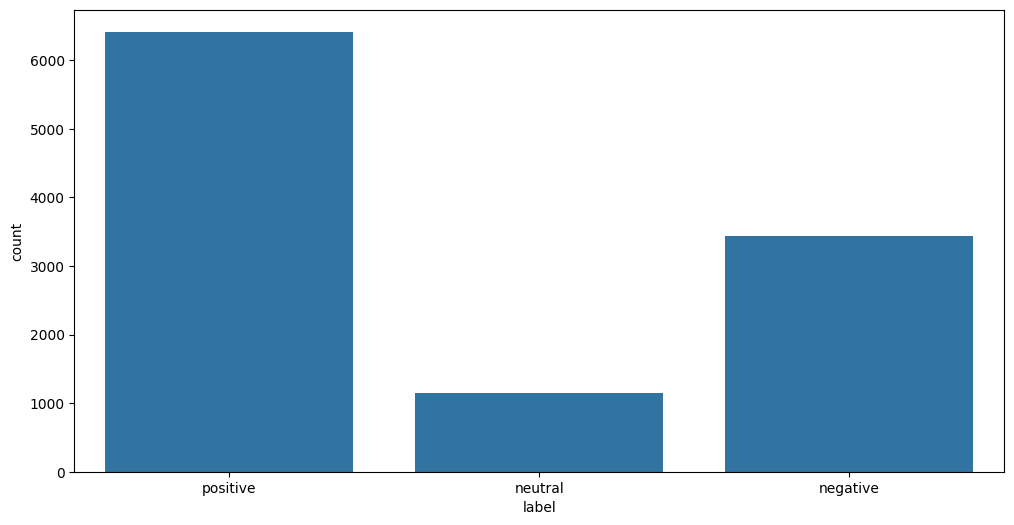

In [69]:
plt.figure(figsize=(12,6))
sns.countplot(x='label',data=data)

Berdasarkan gambar dapat disimpulkan sentimen terbanyak ada di label positive, dan sentimen terkecil ada di label neutral. 

#### Pie Chart

Berikut contoh visualisasi Pie Chart untuk melihat persebaran total data dengan label positive, negative, dan neutral.

<Axes: ylabel='label'>

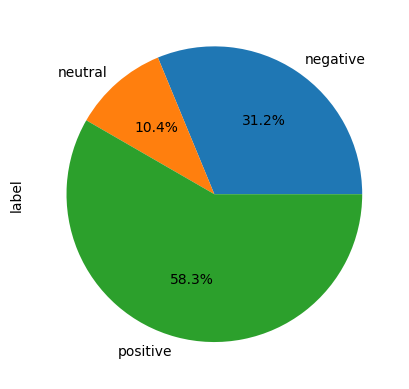

In [70]:
data.groupby('label').label.count().plot(kind='pie',autopct='%1.1f%%')

Berdasarkan gambar dapat disimpulkan sentimen terbanyak ada di label positive sejumlah 58%, dan sentimen terkecil ada di label neutral dengan jumlah 10%. 

#### Histogram

Berikut contoh visualisasi Histogram untuk melihat persebaran label data yang mengandung positive, negative, dan neutral.

<Axes: >

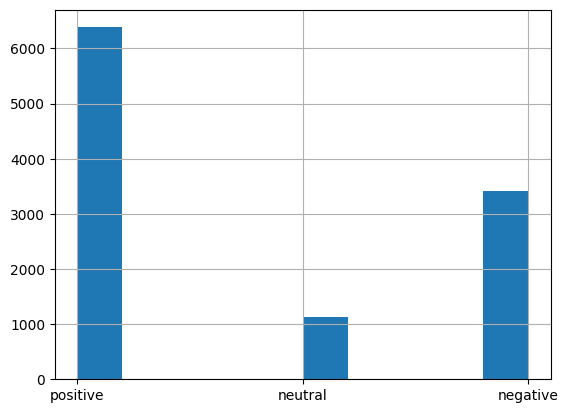

In [71]:
df.label.hist()

Text(0.5, 1.0, 'total_char')

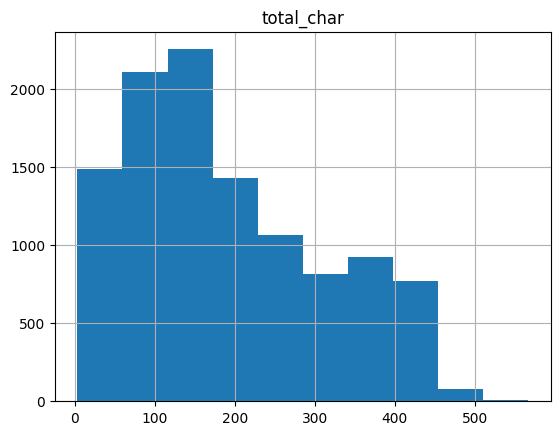

In [90]:
df.total_char.hist()
plt.title('total_char')

Text(0.5, 1.0, 'total_word')

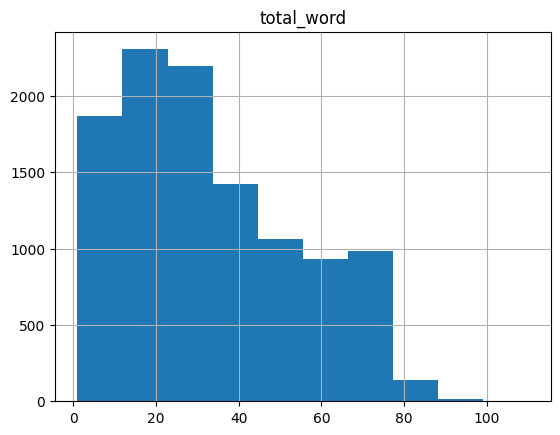

In [92]:
df.total_word.hist()
plt.title('total_word')

#### Wordcloud

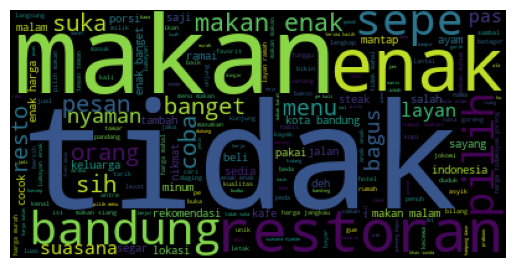

In [86]:
from wordcloud import WordCloud
text = ' '.join(df_new['text_clean'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Kita bisa melihat kata yang sering muncul dengan visualisasi wordcloud. Terlihat pada visualisasi di bawah kata yang sering muncul adalah "makan", "tidak", "enak".